# Put intro here
Include data description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%matplotlib inline 

In [2]:
data_eva = pd.read_csv("../data/observations-evanaturalist.csv")
data_eva.head()

C:\Users\lisa_\AppData\Local\Temp\ipykernel_33856\1506808894.py:1: DtypeWarning: Columns (11,24,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eva = pd.read_csv("../data/observations-evanaturalist.csv")


,id,time_observed_at,time_zone,created_at,updated_at,quality_grade,license,url,image_url,sound_url,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_kingdom_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name
0,14999692,NaN,Eastern Time (US & Canada),2018-07-31 23:09:40 UTC,2018-11-22 10:29:33 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14999692,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Ambystoma texanum,Small-mouthed Salamander,Amphibia,26745.0,Animalia,Amphibia,Caudata,Ambystomatidae,Ambystoma,Ambystoma texanum
1,15000453,NaN,Eastern Time (US & Canada),2018-07-31 23:39:47 UTC,2023-04-23 23:36:37 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15000453,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Spilosoma virginica,Virginian Tiger Moth,Insecta,60839.0,Animalia,Insecta,Lepidoptera,Erebidae,Spilosoma,Spilosoma virginica
2,15005158,NaN,Eastern Time (US & Canada),2018-08-01 02:27:54 UTC,2018-08-03 23:12:43 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15005158,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Alisma,water-plantains,Plantae,60254.0,Plantae,Liliopsida,Alismatales,Alismataceae,Alisma,NaN
3,15029656,NaN,Eastern Time (US & Canada),2018-08-01 22:37:42 UTC,2023-10-22 08:00:22 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15029656,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Sagittaria sagittifolia,Sagittifolia group,Plantae,1504193.0,Plantae,Liliopsida,Alismatales,Alismataceae,Sagittaria,NaN
4,15029889,NaN,Eastern Time (US & Canada),2018-08-01 22:46:35 UTC,2018-08-01 22:46:39 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15029889,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Pleurotus ostreatus,Oyster Mushroom,Fungi,48494.0,Fungi,Agaricomycetes,Agaricales,Pleurotaceae,Pleurotus,Pleurotus ostreatus


In [3]:
data_eva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90752 entries, 0 to 90751
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                90752 non-null  int64  
 1   time_observed_at                  89052 non-null  object 
 2   time_zone                         90752 non-null  object 
 3   created_at                        90752 non-null  object 
 4   updated_at                        90752 non-null  object 
 5   quality_grade                     90752 non-null  object 
 6   license                           90751 non-null  object 
 7   url                               90752 non-null  object 
 8   image_url                         90752 non-null  object 
 9   sound_url                         0 non-null      float64
 10  tag_list                          0 non-null      float64
 11  description                       625 non-null    object 
 12  num_

## Initial Analysis 
The positional accuracy for research [according to iNaturalist](https://www.inaturalist.org/posts/2035-observation-location-accuracy) is less than or equal to 30 m.

I am looking for a dataset that has a high number of Plantae records with positional accuracy of 30 m or less, so am doing this initial analysis prior to formal cleaning and EDA to ensure the dataset has the qualities that would then warrant the labor of cleaning and further analysis.

In order to approximate the experience of finding an endangered plant, I plan to create test sets out of Plantae observations that are rare for this user to encounter, so will be looking at the set of observations whose scientific name occurs rarely within this larger set. 

### Positional Accuracy

In [32]:
pos_acc_desired = 30  #specify number of meters desired for positional accuracy

In [11]:
# Describing positional accuracy range and center values
round(data_eva["positional_accuracy"].describe(),2)

count      90041.00
mean        1004.05
std        11358.91
min            1.00
25%            2.00
50%            8.00
75%          101.00
max      1247072.00
Name: positional_accuracy, dtype: float64

In [33]:
# How many entries with positional accuracy <= 30 m?
o = data_eva[data_eva['positional_accuracy'] <= Desired_pos_acc].shape[0]
print(f'There are {o} observations with positional accuracy of {pos_acc_desired}m or less.')

There are 58643 observations with positional accuracy of 30m or less.


The non null set of positional_accuracy with values less than 200m has 81693 values


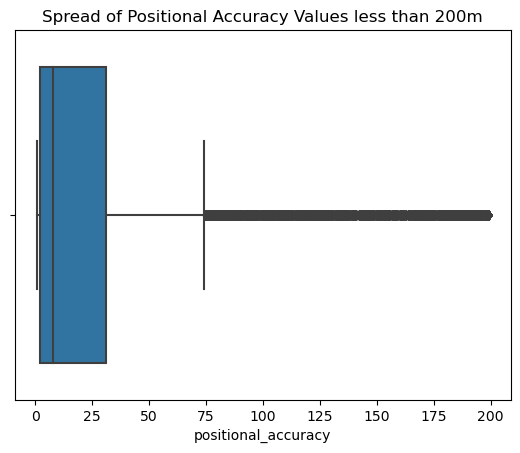

In [14]:
# boxplot of positional accuracy non null values with upper Limit
PA_notnull = pd.DataFrame(data_eva[data_eva["positional_accuracy"].notnull()]["positional_accuracy"])
Limit = 200 #change this number to see other spreads
sns.boxplot(x = "positional_accuracy", 
            data = PA_notnull[PA_notnull["positional_accuracy"] < Limit]) \
            .set_title(f'Spread of Positional Accuracy Values less than {Limit}m')
print(f'The non null set of positional_accuracy with values less than {Limit}m',
      f'has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

### Adding Plantae Filter

In [34]:
# number of Plantae observations with positional accuracy 30 m or less
o = data_eva[(data_eva["iconic_taxon_name"] == 'Plantae') & \
         (data_eva["positional_accuracy"] <= pos_acc_desired)]\
.shape[0]
print(f'There are {o} Plantae observations with positional accuracy of {pos_acc_desired}m or less.')

There are 34124 Plantae observations with positional accuracy of 30m or less.


In [41]:
# count of Plant species with necessary positional accuracy
# that also occurs rarely 
Max_occurences = 2 #specify max number of desired occurences 
o = (data_eva[(data_eva["iconic_taxon_name"] == 'Plantae') & \
          (data_eva["positional_accuracy"] <= pos_acc_desired)]['scientific_name'] \
 .value_counts()<=Max_occurences).sum()

print(f'If we set the max number of sightings to {Max_occurences}, \nthis user has'\
      f' {o} Plantae observations with positional accuracy of {pos_acc_desired}m or less.')

If we set the max number of sightings to 2, 
this user has 1022 Plantae observations with positional accuracy of 30m or less.
